<a href="https://colab.research.google.com/github/jodysuseno/TugasAkhirTKC_073-079/blob/main/tugas/tugas3-opencv_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install wget
import wget
url = "https://github.com/jodysuseno/TugasAkhirTKC_073-079/blob/main/Dataset/id_00000080/01_7_additional.jpg?raw=true"
wget.download(url)

'01_7_additional.jpg'

In [37]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

In [11]:

def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [16]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	# "image": "lab.jpeg"
	"image": "01_7_additional.jpg"
}

aritmetic


In [17]:
# images are NumPy arrays stored as unsigned 8-bit integers (unit8)
# with values in the range [0, 255]; when using the add/subtract
# functions in OpenCV, these values will be *clipped* to this range,
# even if they fall outside the range [0, 255] after applying the
# operation
added = cv2.add(np.uint8([200]), np.uint8([100]))
subtracted = cv2.subtract(np.uint8([50]), np.uint8([100]))
print("max of 255: {}".format(added))
print("min of 0: {}".format(subtracted))

max of 255: [[255]]
min of 0: [[0]]


In [18]:
# using NumPy arithmetic operations (rather than OpenCV operations)
# will result in a modulo ("wrap around") instead of being clipped
# to the range [0, 255]
added = np.uint8([200]) + np.uint8([100])
subtracted = np.uint8([50]) - np.uint8([100])
print("wrap around: {}".format(added))
print("wrap around: {}".format(subtracted))

wrap around: [44]
wrap around: [206]


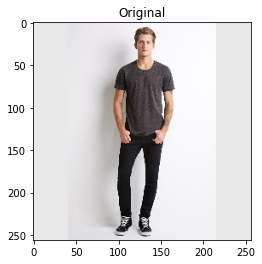

In [19]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"], 1)
# print(image)
plt_imshow("Original", image)

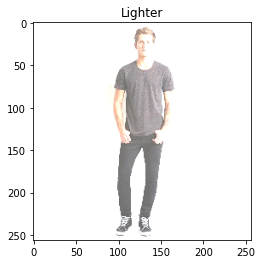

In [20]:
# increasing the pixel intensities in our input image by 100 is
# accomplished by constructing a NumPy array that has the *same
# dimensions* as our input image, filling it with ones, multiplying
# it by 100, and then adding the input image and matrix together
M = np.ones(image.shape, dtype="uint8") * 100
added = cv2.add(image, M)
plt_imshow("Lighter", added)

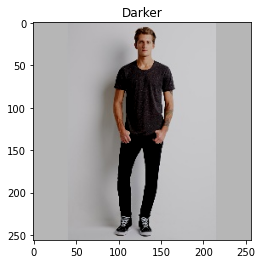

In [21]:
# similarly, we can subtract 50 from all pixels in our image and make it
# darker
M = np.ones(image.shape, dtype="uint8") * 50
subtracted = cv2.subtract(image, M)
plt_imshow("Darker", subtracted)

Cropping

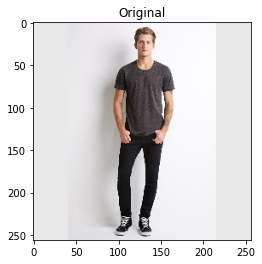

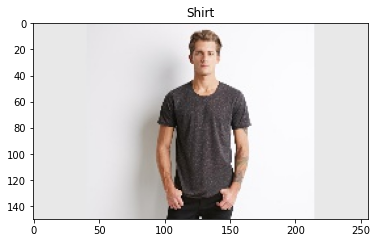

In [22]:

# load the input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the monitor from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
# Dimension lab.jpeg = 720x1600
Shirt = image[0:150, 0:]
plt_imshow("Shirt", Shirt)

Drawing

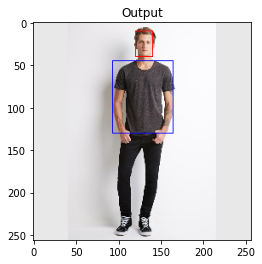

In [23]:
# load the input image from disk
image = cv2.imread(args["image"])

# cv2.rectangle(canvas, (10, 10), (60, 60), green)
cv2.rectangle(image, (120, 10), (140, 40), (0, 0, 255))
cv2.rectangle(image, (93, 45), (164, 130), (255, 0, 0))

# show the output image
plt_imshow("Output", image)

Flipping

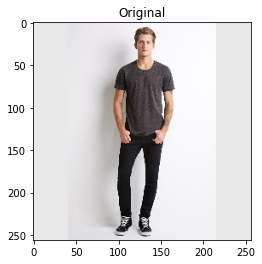

[INFO] flipping image horizontally...


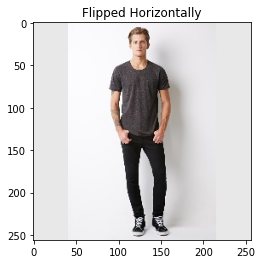

In [24]:

# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# flip the image horizontally
print("[INFO] flipping image horizontally...")
flipped = cv2.flip(image, 1)
plt_imshow("Flipped Horizontally", flipped)

[INFO] flipping image vertically...


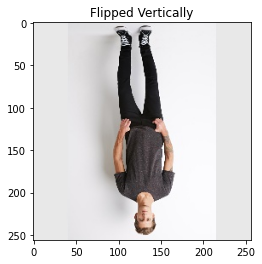

[INFO] flipping image horizontally and vertically...


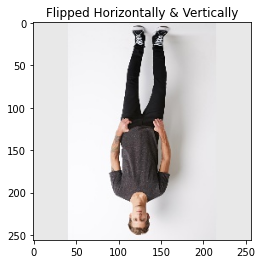

In [25]:
# flip the image vertically
flipped = cv2.flip(image, 0)
print("[INFO] flipping image vertically...")
plt_imshow("Flipped Vertically", flipped)

# flip the image along both axes
flipped = cv2.flip(image, -1)
print("[INFO] flipping image horizontally and vertically...")
plt_imshow("Flipped Horizontally & Vertically", flipped)

Masking

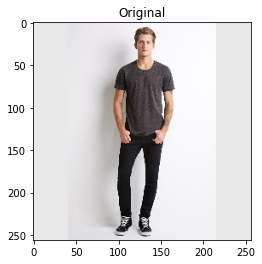

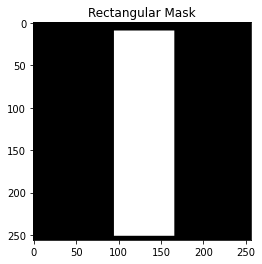

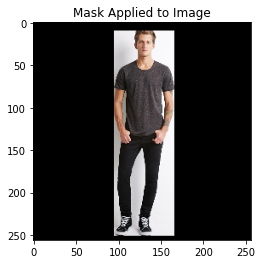

In [26]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask, (95, 10), (165, 250), 255, -1)
plt_imshow("Rectangular Mask", mask)

# apply our mask -- notice how only the person in the image is
# cropped out
masked = cv2.bitwise_and(image, image, mask=mask)
plt_imshow("Mask Applied to Image", masked)

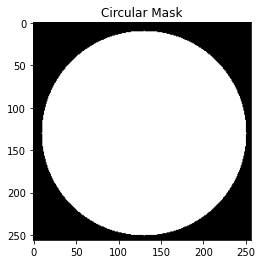

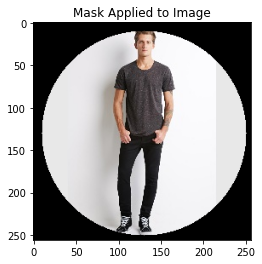

In [27]:
# now, let's make a circular mask with a radius of 100 pixels and
# apply the mask again
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask, (130, 130), 120, 255, -1)
masked = cv2.bitwise_and(image, image, mask=mask)

# show the output images
plt_imshow("Circular Mask", mask)
plt_imshow("Mask Applied to Image", masked)

Pixel

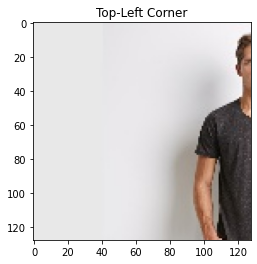

In [29]:
# compute the center of the image, which is simply the width and height
# divided by two
(cX, cY) = (w // 2, h // 2)

# since we are using NumPy arrays, we can apply array slicing to grab
# large chunks/regions of interest from the image -- here we grab the
# top-left corner of the image
tl = image[0:cY, 0:cX]
plt_imshow("Top-Left Corner", tl)

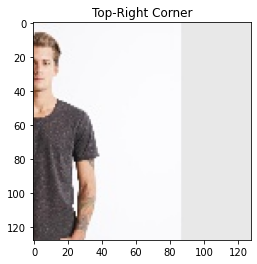

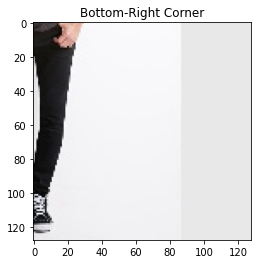

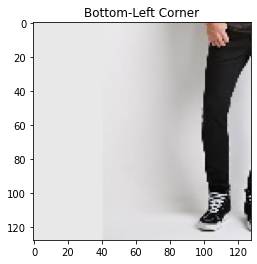

In [30]:
# in a similar fashion, we can crop the top-right, bottom-right, and
# bottom-left corners of the image and then display them to our
# screen
tr = image[0:cY, cX:w]
br = image[cY:h, cX:w]
bl = image[cY:h, 0:cX]
plt_imshow("Top-Right Corner", tr)
plt_imshow("Bottom-Right Corner", br)
plt_imshow("Bottom-Left Corner", bl)

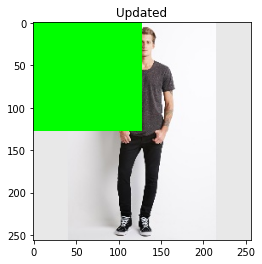

In [31]:
# set the top-left corner of the original image to be green
image[0:cY, 0:cX] = (0, 255, 0)

# Show our updated image
plt_imshow("Updated", image)

Read Write Image

In [32]:
# load the image from disk via "cv2.imread" and then grab the spatial
# dimensions, including width, height, and number of channels
image = cv2.imread(args["image"])
(h, w, c) = image.shape[:3]

# display the image width, height, and number of channels to our
# terminal
print("width: {} pixels".format(image.shape[1]))
print("height: {}  pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))

width: 256 pixels
height: 256  pixels
channels: 3


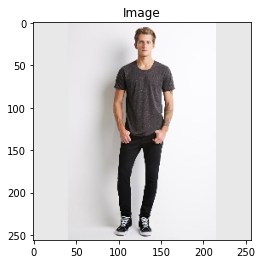

True

In [33]:
# show the image and wait for a keypress
plt_imshow("Image", image)

# save the image back to disk (OpenCV handles converting image
# filetypes automatically)
cv2.imwrite("Tshirt_new.jpg", image)

Resize

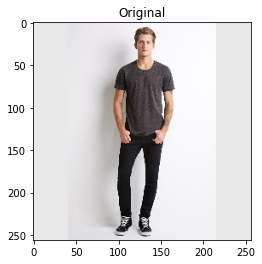

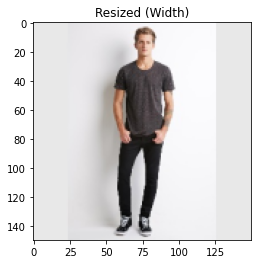

In [34]:
# load the original input image and display it to our screen
image = cv2.imread(args["image"])
plt_imshow("Original", image)

# let's resize our image to be 150 pixels wide, but in order to
# prevent our resized image from being skewed/distorted, we must
# first calculate the ratio of the *new* width to the *old* width
r = 150.0 / image.shape[1]
dim = (150, int(image.shape[0] * r))

# perform the actual resizing of the image
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Width)", resized)

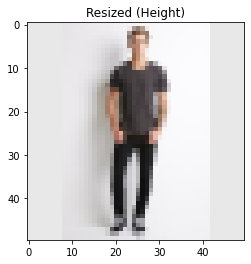

In [35]:
# let's resize the image to have a width of 50 pixels, again keeping
# in mind the aspect ratio
r = 50.0 / image.shape[0]
dim = (int(image.shape[1] * r), 50)

# perform the resizing
resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt_imshow("Resized (Height)", resized)

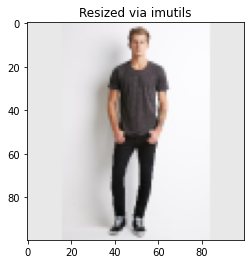

In [38]:

# calculating the ratio each and every time we want to resize an
# image is a real pain, so let's use the imutils convenience
# function which will *automatically* maintain our aspect ratio
# for us
resized = imutils.resize(image, width=100)
plt_imshow("Resized via imutils", resized)

[INFO] cv2.INTER_NEAREST


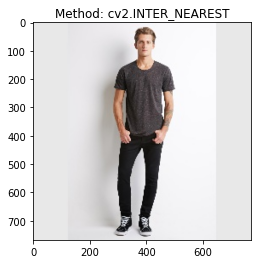

[INFO] cv2.INTER_LINEAR


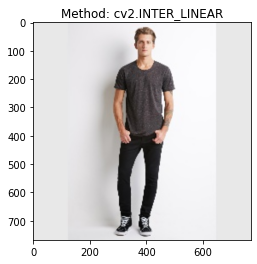

[INFO] cv2.INTER_AREA


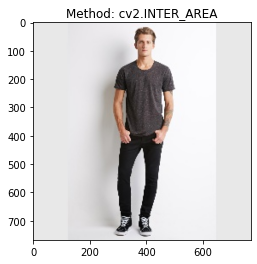

[INFO] cv2.INTER_CUBIC


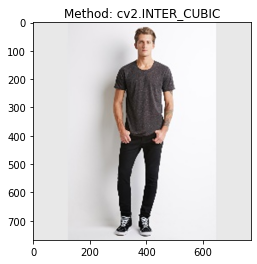

[INFO] cv2.INTER_LANCZOS4


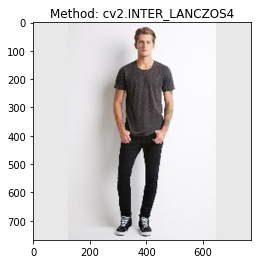

In [39]:

# construct the list of interpolation methods in OpenCV
methods = [
	("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
	("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
	("cv2.INTER_AREA", cv2.INTER_AREA),
	("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
	("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

# loop over the interpolation methods
for (name, method) in methods:
	# increase the size of the image by 3x using the current
	# interpolation method
	print("[INFO] {}".format(name))
	resized = imutils.resize(image, width=image.shape[1] * 3,
		inter=method)
	plt_imshow("Method: {}".format(name), resized)